In [1]:
import pandas as pd
import nltk
from nltk.tree import Tree
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/luerlyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df = pd.read_csv('/Users/luerlyu/Downloads/data2_true.csv', delimiter = ',')

In [3]:
df=df[:50]

In [3]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

In [21]:
tokens_sentences = []

In [22]:
for text in df['text']:
    #text = text.replace(",", ".")
    text = text.replace("%", "")
    sent = nltk.sent_tokenize(text)
    for s in sent:
        tokens_sentences.append(s)
    

In [25]:
len(tokens_sentences)

985

In [26]:
tokens_sentences[1]

'The entire family and everyone who came in with them need to be deported asap.'

In [31]:
output = nlp.annotate(tokens_sentences[1], properties={
        'annotators': 'parse',
        'outputFormat': 'json',
        'timeout': 1000,
    })
print(output['sentences'][0]["parse"])

(ROOT
  (S
    (NP
      (NP (DT The) (JJ entire) (NN family)
        (CC and)
        (NN everyone))
      (SBAR
        (WHNP (WP who))
        (S
          (VP (VBD came)
            (PRT (RP in))
            (PP (IN with)
              (NP (PRP them)))))))
    (VP (VBP need)
      (S
        (VP (TO to)
          (VP (VB be)
            (VP (VBN deported)
              (ADVP (RB asap)))))))
    (. .)))


In [32]:
tree=Tree.fromstring(output['sentences'][0]["parse"])
print(tree.height())

10


In [6]:
def get_height(text):
    output = nlp.annotate(text, properties={
        'annotators': 'parse',
        'outputFormat': 'json',
        'timeout': 50000,
    })
    tree=Tree.fromstring(output['sentences'][0]["parse"])
    return tree.height()

In [23]:
heights = [get_height(text) for text in tokens_sentences if len(text)<=400]

In [101]:
len(heights)

927

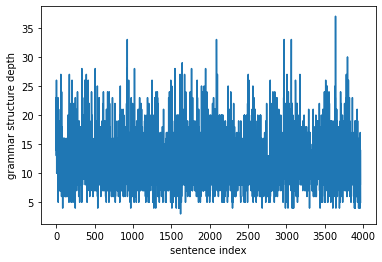

In [24]:
plt.plot(range(len(heights)),heights)
plt.ylabel('grammar structure depth')
plt.xlabel('sentence index')
plt.show()

In [103]:
mean = sum(heights) / len(heights) 
mean

11.303128371089537

In [104]:
import numpy as np
std = np.std(heights)
std

5.112100513371927

In [105]:
max(heights)

31

In [106]:
min(heights)

4

In [107]:
print("Q2 quantile of arr : ", np.quantile(heights, .50)) 
print("Q1 quantile of arr : ", np.quantile(heights, .25)) 
print("Q3 quantile of arr : ", np.quantile(heights, .75))

Q2 quantile of arr :  11.0
Q1 quantile of arr :  7.0
Q3 quantile of arr :  14.0
